# Dataset about breast cancer
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

link for more information: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [3]:
features_cancer = pd.read_csv('entradas_breast.csv')
classes_cancer = pd.read_csv('saidas_breast.csv')

In [4]:
# in order to split in train and test
from sklearn.model_selection import train_test_split

In [5]:
features_train, features_test, classes_train, classes_test = train_test_split(features_cancer, classes_cancer, test_size=0.25, random_state=0)

In [7]:
features_cancer.shape

(569, 30)

In [8]:
classifier = Sequential()
classifier.add(Dense(units = 16, activation = 'relu',
                     kernel_initializer='random_uniform',
                     input_dim= 30))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Modify default optimizer **Adam**

- learning_rate = learning rate (add the steps of the weights  )
- decay = how much faster learning rate decreasing
- clipvalue or clipnorm control gradient clipping, in order to avoid convergence issues in  descent gradient, limit the max value

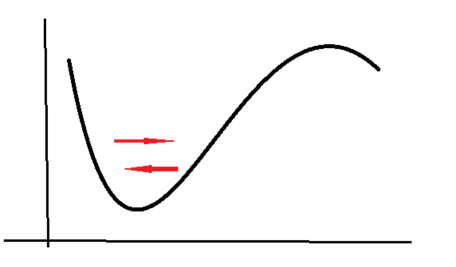
 -

In [14]:
optimizer = keras.optimizers.Adam( learning_rate = 0.001,
                                  decay=0.001,
                                  clipvalue=0.5)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [15]:
classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy',
                   metrics = ['binary_accuracy'])
classifier.fit(features_train,
               classes_train,
               batch_size = 10,
               epochs = 100)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.5639 - loss: 11.7200
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6219 - loss: 2.7502
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7439 - loss: 0.8057
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8509 - loss: 0.7459
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7630 - loss: 1.1506
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8379 - loss: 0.9037
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7437 - loss: 1.2680
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7982 - loss: 0.9984
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7785 - loss: 1.2359
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8537 - loss: 0.6266
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7425 

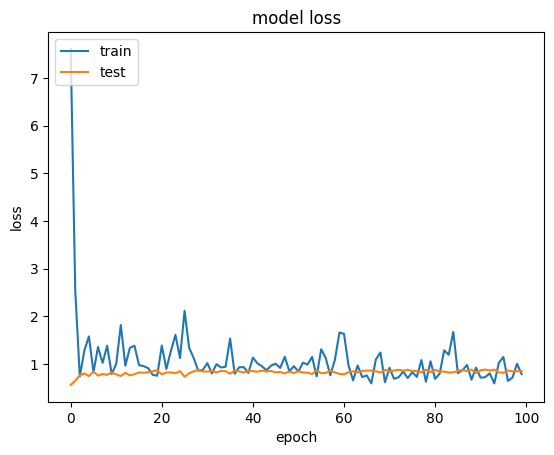

In [16]:
import matplotlib.pyplot as plt
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['binary_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [20]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,541 (6.02 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,028 (4.02 KB)

In [29]:
weight = classifier.layers[0].get_weights()
weight

[array([[-1.63608477e-01, -2.59108655e-02, -2.01958179e-01,
          9.64801293e-03, -2.60681450e-01, -6.33557811e-02,
         -1.11989565e-02, -6.12664334e-02,  5.74584631e-03,
         -9.00990516e-02, -1.72624916e-01, -1.21697858e-01,
         -8.71971902e-03, -4.23926599e-02, -4.39371914e-02,
         -1.04711719e-01],
        [-1.63626567e-01, -2.33829841e-02, -1.66951284e-01,
          4.08141054e-02, -3.09296846e-01, -9.33008343e-02,
         -7.21943844e-03, -1.52327597e-01,  5.09221442e-02,
         -7.97767639e-02, -1.42891064e-01, -1.58291087e-01,
         -1.28794434e-02, -3.20088491e-02, -7.03533040e-03,
         -1.22839905e-01],
        [ 4.81667593e-02,  9.02894959e-02, -1.17005620e-04,
          3.56272459e-02, -6.10719062e-02,  5.35693765e-03,
         -8.90229121e-02,  6.41578734e-02, -3.85623723e-02,
         -9.82180797e-03, -1.76328182e-01,  4.90834676e-02,
         -3.98288891e-02, -8.50938261e-04,  5.12156747e-02,
          5.33935651e-02],
        [ 1.4116534